# Actividad 4.1
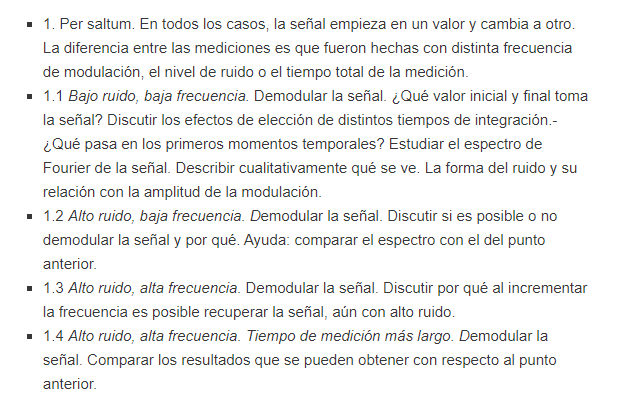

#### Importamos las librerias 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

#### 1.1

<IPython.core.display.Javascript object>


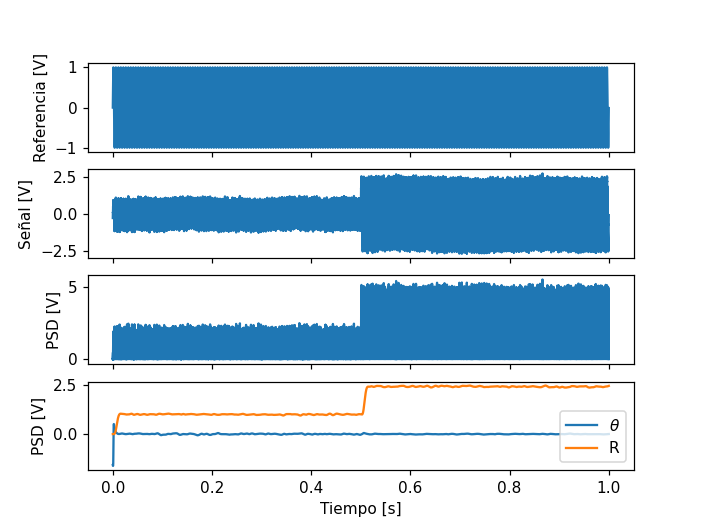

100000

In [59]:
#Para una medici+on
%matplotlib nbagg

medicion = np.loadtxt('data/v1/ej11_medicion.txt', delimiter=' ', skiprows=3)

f_samp = 100000
muestras = len(medicion)
T = 1/f_samp  #periodo
tiempo_max = muestras/f_samp
t = np.linspace(0, muestras-1,muestras)*T

F_ref = 200
omega_ref=  F_ref*2*np.pi
referencia_x = np.array(np.sin(omega_ref*t))
referencia_y = np.array(np.cos(omega_ref*t))

PSDx = 2*medicion*referencia_x
PSDy=  2*medicion*referencia_y

fc = 15
orden = 6

# Filtrado de señal 
sos = signal.bessel(orden, 2*np.pi*fc, 'low', fs=f_samp,output='sos') # Generación de parametros del filrado
PSDxFiltrada= signal.sosfilt(sos,PSDx) # Filtrado
PSDyFiltrada= signal.sosfilt(sos,PSDy) # Filtrado

plt.figure()
fig, ax = plt.subplots(4,1, num=1, sharex=True)
ax[0].plot(t, referencia_x, label = 'referencia')
ax[0].set_ylabel('Referencia [V]')

ax[1].plot(t,medicion, label = 'señal')
ax[1].set_ylabel('Señal [V]')

ax[2].plot(t, PSDx, label = 'señal')
ax[2].set_ylabel('PSD [V]')

ax[3].plot(t,np.arctan2(PSDyFiltrada, PSDxFiltrada), label = r'$\theta$')
ax[3].plot(t, np.sqrt(PSDxFiltrada**2+PSDyFiltrada**2), label = 'R')
ax[3].set_ylabel('PSD [V]')
ax[3].set_xlabel('Tiempo [s]')
plt.legend(loc='lower right')
plt.show()

len(PSDxFiltrada)

La altura de la primera parte es 1.05 y la altura de la segunda mitad es 2.4

Graficamos la transformada de Fourier

<IPython.core.display.Javascript object>


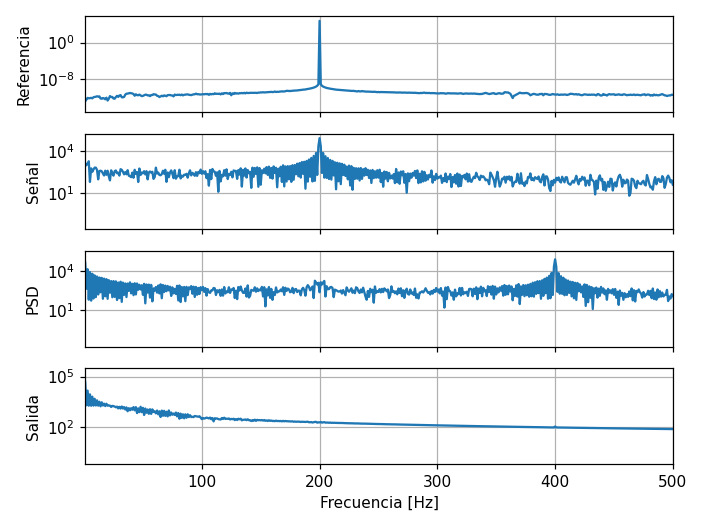

In [31]:
L = muestras
plt.figure()
fig, ax = plt.subplots(4,1,num=2,sharex=True)
# Determinamos los ejes para todos lo gráficos.
ax[3].set_xlabel('Frecuencia [Hz]')
ax[3].set_xlim([1,2.5*F_ref])
ax[3].set_xscale('linear')


# Armamos el vector de frecuencias.
freqs=np.fft.fftfreq(L,1/f_samp)

# 1 Grafica la FFT de la referencia
fftReferencia= np.abs(np.fft.fft(referencia_x));
ax[0].semilogy(freqs[0:L//2],fftReferencia[0:L//2]) 
ax[0].set_ylabel('Referencia'),ax[0].grid(True)


# 2 Grafica la FFT de la señal
fftSenial= np.abs(np.fft.fft(medicion));
ax[1].semilogy(freqs[0:L//2],fftSenial[0:L//2]) 
ax[1].set_ylabel('Señal'),ax[1].grid(True)

# 3 Grafica la FFT de la señal multiplicada
fftPSDx= np.abs(np.fft.fft(PSDx));
fftPSDy= np.abs(np.fft.fft(PSDy));
ax[2].semilogy(freqs[0:L//2],fftPSDx[0:L//2]) 
ax[2].set_ylabel('PSD'),ax[2].grid(True)


# 4 Grafica la FFT de la señal demodulada
fftPSDxFiltrada= np.abs(np.fft.fft(PSDxFiltrada));
fftPSDyFiltrada= np.abs(np.fft.fft(PSDyFiltrada));
ax[3].semilogy(freqs[0:L//2],fftPSDxFiltrada[0:L//2]) 
ax[3].set_ylabel('Salida'),ax[3].grid(True)


plt.tight_layout()  

Hacemos la integral en un tiempo menor

En este caso, en el PSD aparecen dos picos, uno en 0 y uno en el doble de la frecuencia es decir en 400Hz

### 1.2

<IPython.core.display.Javascript object>


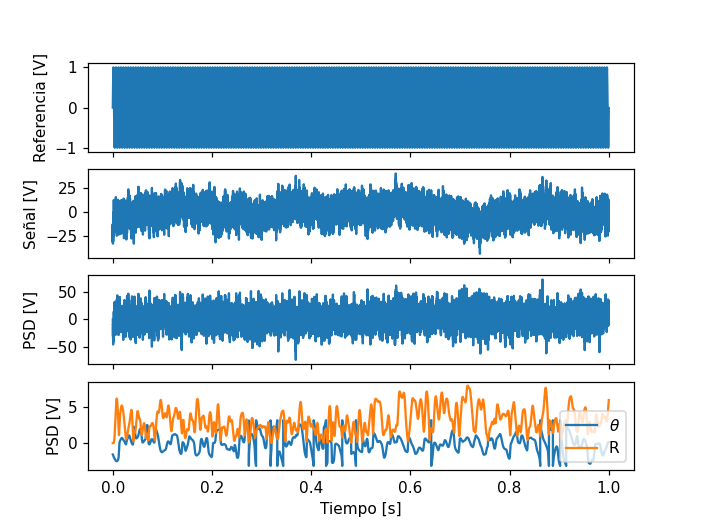

In [32]:
%matplotlib nbagg

medicion = np.loadtxt('data/v1/ej12_medicion.txt', delimiter=' ', skiprows=3)

f_samp = 100000
muestras = len(medicion)
T = 1/f_samp  #periodo
tiempo_max = muestras/f_samp
t = np.linspace(0, muestras-1,muestras)*T

F_ref = 200
omega_ref=  F_ref*2*np.pi
referencia_x = np.array(np.sin(omega_ref*t))
referencia_y = np.array(np.cos(omega_ref*t))

PSDx = 2*medicion*referencia_x
PSDy=  2*medicion*referencia_y

fc = 15
orden = 6

# Filtrado de señal 
sos = signal.bessel(orden, 2*np.pi*fc, 'low', fs=f_samp,output='sos') # Generación de parametros del filrado
PSDxFiltrada= signal.sosfilt(sos,PSDx) # Filtrado
PSDyFiltrada= signal.sosfilt(sos,PSDy) # Filtrado

plt.figure()
fig, ax = plt.subplots(4,1, num=1, sharex=True)
ax[0].plot(t, referencia_x, label = 'referencia')
ax[0].set_ylabel('Referencia [V]')

ax[1].plot(t,medicion, label = 'señal')
ax[1].set_ylabel('Señal [V]')

ax[2].plot(t, PSDx, label = 'señal')
ax[2].set_ylabel('PSD [V]')

ax[3].plot(t,np.arctan2(PSDyFiltrada, PSDxFiltrada), label = r'$\theta$')
ax[3].plot(t, np.sqrt(PSDxFiltrada**2+PSDyFiltrada**2), label = 'R')
ax[3].set_ylabel('PSD [V]')
ax[3].set_xlabel('Tiempo [s]')
plt.legend(loc='lower right')

Graficamos la transformada de Fourier

<IPython.core.display.Javascript object>


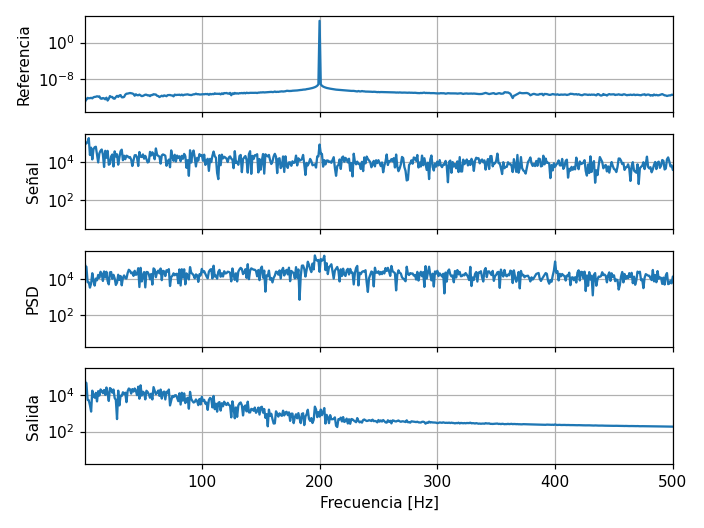

In [33]:
L = muestras
plt.figure()
fig, ax = plt.subplots(4,1,num=2,sharex=True)
# Determinamos los ejes para todos lo gráficos.
ax[3].set_xlabel('Frecuencia [Hz]')
ax[3].set_xlim([1,2.5*F_ref])
ax[3].set_xscale('linear')


# Armamos el vector de frecuencias.
freqs=np.fft.fftfreq(L,1/f_samp)

# 1 Grafica la FFT de la referencia
fftReferencia= np.abs(np.fft.fft(referencia_x));
ax[0].semilogy(freqs[0:L//2],fftReferencia[0:L//2]) 
ax[0].set_ylabel('Referencia'),ax[0].grid(True)


# 2 Grafica la FFT de la señal
fftSenial= np.abs(np.fft.fft(medicion));
ax[1].semilogy(freqs[0:L//2],fftSenial[0:L//2]) 
ax[1].set_ylabel('Señal'),ax[1].grid(True)

# 3 Grafica la FFT de la señal multiplicada
fftPSDx= np.abs(np.fft.fft(PSDx));
fftPSDy= np.abs(np.fft.fft(PSDy));
ax[2].semilogy(freqs[0:L//2],fftPSDx[0:L//2]) 
ax[2].set_ylabel('PSD'),ax[2].grid(True)


# 4 Grafica la FFT de la señal demodulada
fftPSDxFiltrada= np.abs(np.fft.fft(PSDxFiltrada));
fftPSDyFiltrada= np.abs(np.fft.fft(PSDyFiltrada));
ax[3].semilogy(freqs[0:L//2],fftPSDxFiltrada[0:L//2]) 
ax[3].set_ylabel('Salida'),ax[3].grid(True)


plt.tight_layout()  

En este caso, no es posible desmodular la señal, en cambio en el caso anterior si lo era. En este caso, el PSD de la TF no presenta un pico en el doble de la frecuencia (400 Hz) y por esta razón no es posible la demodulación de la señal. 

### 1.3

<IPython.core.display.Javascript object>


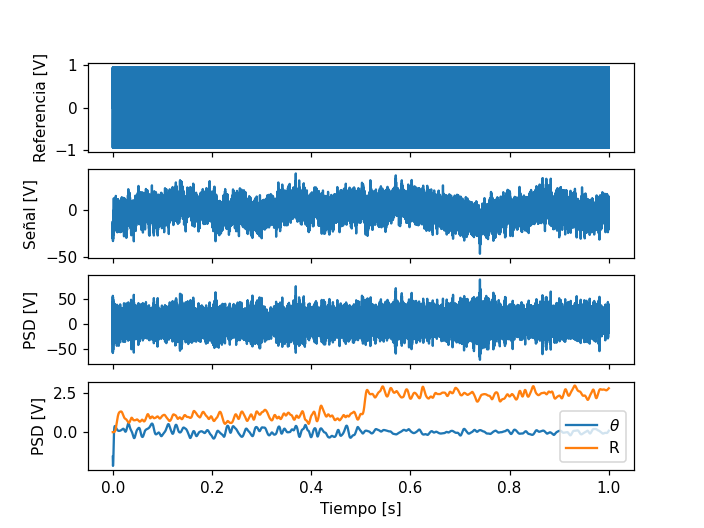

In [56]:
%matplotlib nbagg

medicion = np.loadtxt('data/v1/ej13_medicion.txt', delimiter=' ', skiprows=3)

f_samp = 100000
muestras = len(medicion)
T = 1/f_samp  #periodo
tiempo_max = muestras/f_samp
t = np.linspace(0, muestras-1,muestras)*T

F_ref = 20000
omega_ref=  F_ref*2*np.pi
referencia_x = np.array(np.sin(omega_ref*t))
referencia_y = np.array(np.cos(omega_ref*t))

PSDx = 2*medicion*referencia_x
PSDy=  2*medicion*referencia_y

fc = 15
orden = 6

# Filtrado de señal 
sos = signal.bessel(orden, 2*np.pi*fc, 'low', fs=f_samp,output='sos') # Generación de parametros del filrado
PSDxFiltrada= signal.sosfilt(sos,PSDx) # Filtrado
PSDyFiltrada= signal.sosfilt(sos,PSDy) # Filtrado

plt.figure()
fig, ax = plt.subplots(4,1, num=1, sharex=True)
ax[0].plot(t, referencia_x, label = 'referencia')
ax[0].set_ylabel('Referencia [V]')

ax[1].plot(t,medicion, label = 'señal')
ax[1].set_ylabel('Señal [V]')

ax[2].plot(t, PSDx, label = 'señal')
ax[2].set_ylabel('PSD [V]')

ax[3].plot(t,np.arctan2(PSDyFiltrada, PSDxFiltrada), label = r'$\theta$')
ax[3].plot(t, np.sqrt(PSDxFiltrada**2+PSDyFiltrada**2), label = 'R')
ax[3].set_ylabel('PSD [V]')
ax[3].set_xlabel('Tiempo [s]')
plt.legend(loc='lower right')

Se ve que se puede hacer la demodulación de la señal, aunque no sea perfecra, tiene mucho ruido esta demodulación. El valor mínimo de la señal es 1.1 y el máximo es 2.5

### 1.4

<IPython.core.display.Javascript object>


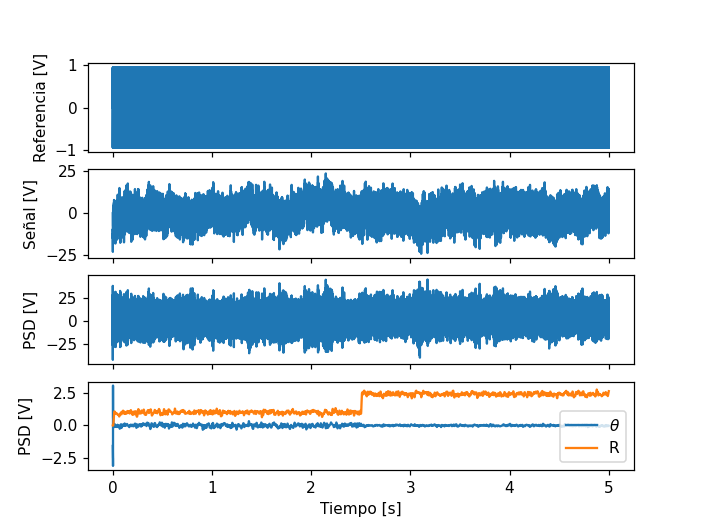

In [57]:
%matplotlib nbagg

medicion = np.loadtxt('data/v1/ej14_medicion.txt', delimiter=' ', skiprows=3)

f_samp = 100000
muestras = len(medicion)
T = 1/f_samp  #periodo
tiempo_max = muestras/f_samp
t = np.linspace(0, muestras-1,muestras)*T

F_ref = 20000
omega_ref=  F_ref*2*np.pi
referencia_x = np.array(np.sin(omega_ref*t))
referencia_y = np.array(np.cos(omega_ref*t))

PSDx = 2*medicion*referencia_x
PSDy=  2*medicion*referencia_y

fc = 15
orden = 6

# Filtrado de señal 
sos = signal.bessel(orden, 2*np.pi*fc, 'low', fs=f_samp,output='sos') # Generación de parametros del filrado
PSDxFiltrada= signal.sosfilt(sos,PSDx) # Filtrado
PSDyFiltrada= signal.sosfilt(sos,PSDy) # Filtrado

plt.figure()
fig, ax = plt.subplots(4,1, num=1, sharex=True)
ax[0].plot(t, referencia_x, label = 'referencia')
ax[0].set_ylabel('Referencia [V]')

ax[1].plot(t,medicion, label = 'señal')
ax[1].set_ylabel('Señal [V]')

ax[2].plot(t, PSDx, label = 'señal')
ax[2].set_ylabel('PSD [V]')

ax[3].plot(t,np.arctan2(PSDyFiltrada, PSDxFiltrada), label = r'$\theta$')
ax[3].plot(t, np.sqrt(PSDxFiltrada**2+PSDyFiltrada**2), label = 'R')
ax[3].set_ylabel('PSD [V]')
ax[3].set_xlabel('Tiempo [s]')
plt.legend(loc='lower right')

En este caso la modulación es mucho mejor que en el caso anterior, al tener mas tiempo el ruido de la demodulación es menor, al menos para frecuencias altas y ruido alto. El valor mínimo de la señal es 1.1 y el maximo es 2.5

En conclusión la demodulación se puede hacer para casos con baja frecuencia y bajo ruido y para alta frecuencia y alto ruido, pero en este caso es muy conveniente tomar tiempos más largos, de esta forma la demodulación va a ser mejor y esta va a tener menos ruido. En el vaso de alto ruido y baja frecuencia la demodulación no se puede hacer, es decir no se distinguen claramente las distintas componentes